<a href="https://colab.research.google.com/github/mottasilvia/UCU-DeepLearning-Project/blob/main/train_yolov8_object_detection_on_combinado_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAIN YOLO V 8 ON CUSTOM DATA **

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Jun 15 21:00:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch  # PyTorch es comúnmente usado para verificar la disponibilidad de GPU

# Verifica si CUDA está disponible, lo cual indica la disponibilidad de GPU
if torch.cuda.is_available():
    print(f"GPU Disponible: {torch.cuda.get_device_name(0)}")
else:
    print("GPU No Disponible")

GPU Disponible: Tesla T4


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLO

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.9/201.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
/bin/bash: line 1: yolo: command not found


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/vlc-record.mp4' save=True

/content
/bin/bash: line 1: yolo: command not found


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
/bin/bash: line 1: yolo: command not found


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
/bin/bash: line 1: yolo: command not found


In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

/content


NameError: name 'Image' is not defined

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")

/content/datasets/datasets
upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=undefined&ref=undefined


## Custom Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
import os

# Crear un directorio para los datasets
!mkdir -p {os.environ['HOME']}/datasets

# Descargar el primer dataset
rf = Roboflow(api_key="qoRuT4r6jXcLdFGD8Dc6")
project1 = rf.workspace("maestria").project("test03-pvwu2")
version1 = project1.version(2)
dataset1 = version1.download("yolov8", location=f"{os.environ['HOME']}/datasets/test03")

# Descargar el segundo dataset
project2 = rf.workspace("maestria").project("test02-ta9qb")
version2 = project2.version(3)
dataset2 = version2.download("yolov8", location=f"{os.environ['HOME']}/datasets/test02")


loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
import shutil

# Directorios de los datasets originales
dataset1_dir = "/root/datasets/test02"
dataset2_dir = "/root/datasets/test03"

# Directorio del dataset combinado
combined_dataset_dir = "/root/datasets/combine"

# Crear la estructura de directorios para el dataset combinado
for subdir in ["train", "test", "valid"]:
    os.makedirs(os.path.join(combined_dataset_dir, subdir, "images"), exist_ok=True)
    os.makedirs(os.path.join(combined_dataset_dir, subdir, "labels"), exist_ok=True)

# Función para combinar los archivos de imágenes y etiquetas de un dataset en el dataset combinado
def combine_datasets(src_dir, dst_dir):
    for subdir in ["train", "test", "valid"]:
        src_images = os.path.join(src_dir, subdir, "images")
        src_labels = os.path.join(src_dir, subdir, "labels")
        dst_images = os.path.join(dst_dir, subdir, "images")
        dst_labels = os.path.join(dst_dir, subdir, "labels")

        if os.path.exists(src_images):
            for file_name in os.listdir(src_images):
                shutil.copy(os.path.join(src_images, file_name), os.path.join(dst_images, file_name))

        if os.path.exists(src_labels):
            for file_name in os.listdir(src_labels):
                shutil.copy(os.path.join(src_labels, file_name), os.path.join(dst_labels, file_name))

# Combinar los dos datasets en el dataset combinado
combine_datasets(dataset1_dir, combined_dataset_dir)
combine_datasets(dataset2_dir, combined_dataset_dir)

print("Datasets combinados con éxito en:", combined_dataset_dir)


Datasets combinados con éxito en: /root/datasets/combine


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/root/datasets/combine/data.yaml epochs=25 imgsz=800 plots=True


/content/datasets
100% 21.5M/21.5M [00:00<00:00, 358MB/s]
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/root/datasets/combine/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

In [ ]:
!echo $HOME

/content/datasets


In [ ]:
!ls {HOME}/runs/detect/train/


args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1717724018.a2a402ca2242.13603.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2520.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch2521.jpg  weights
P_curve.png					     train_batch2522.jpg
PR_curve.png					     train_batch2.jpg


In [ ]:
from IPython.display import Image


/content/datasets


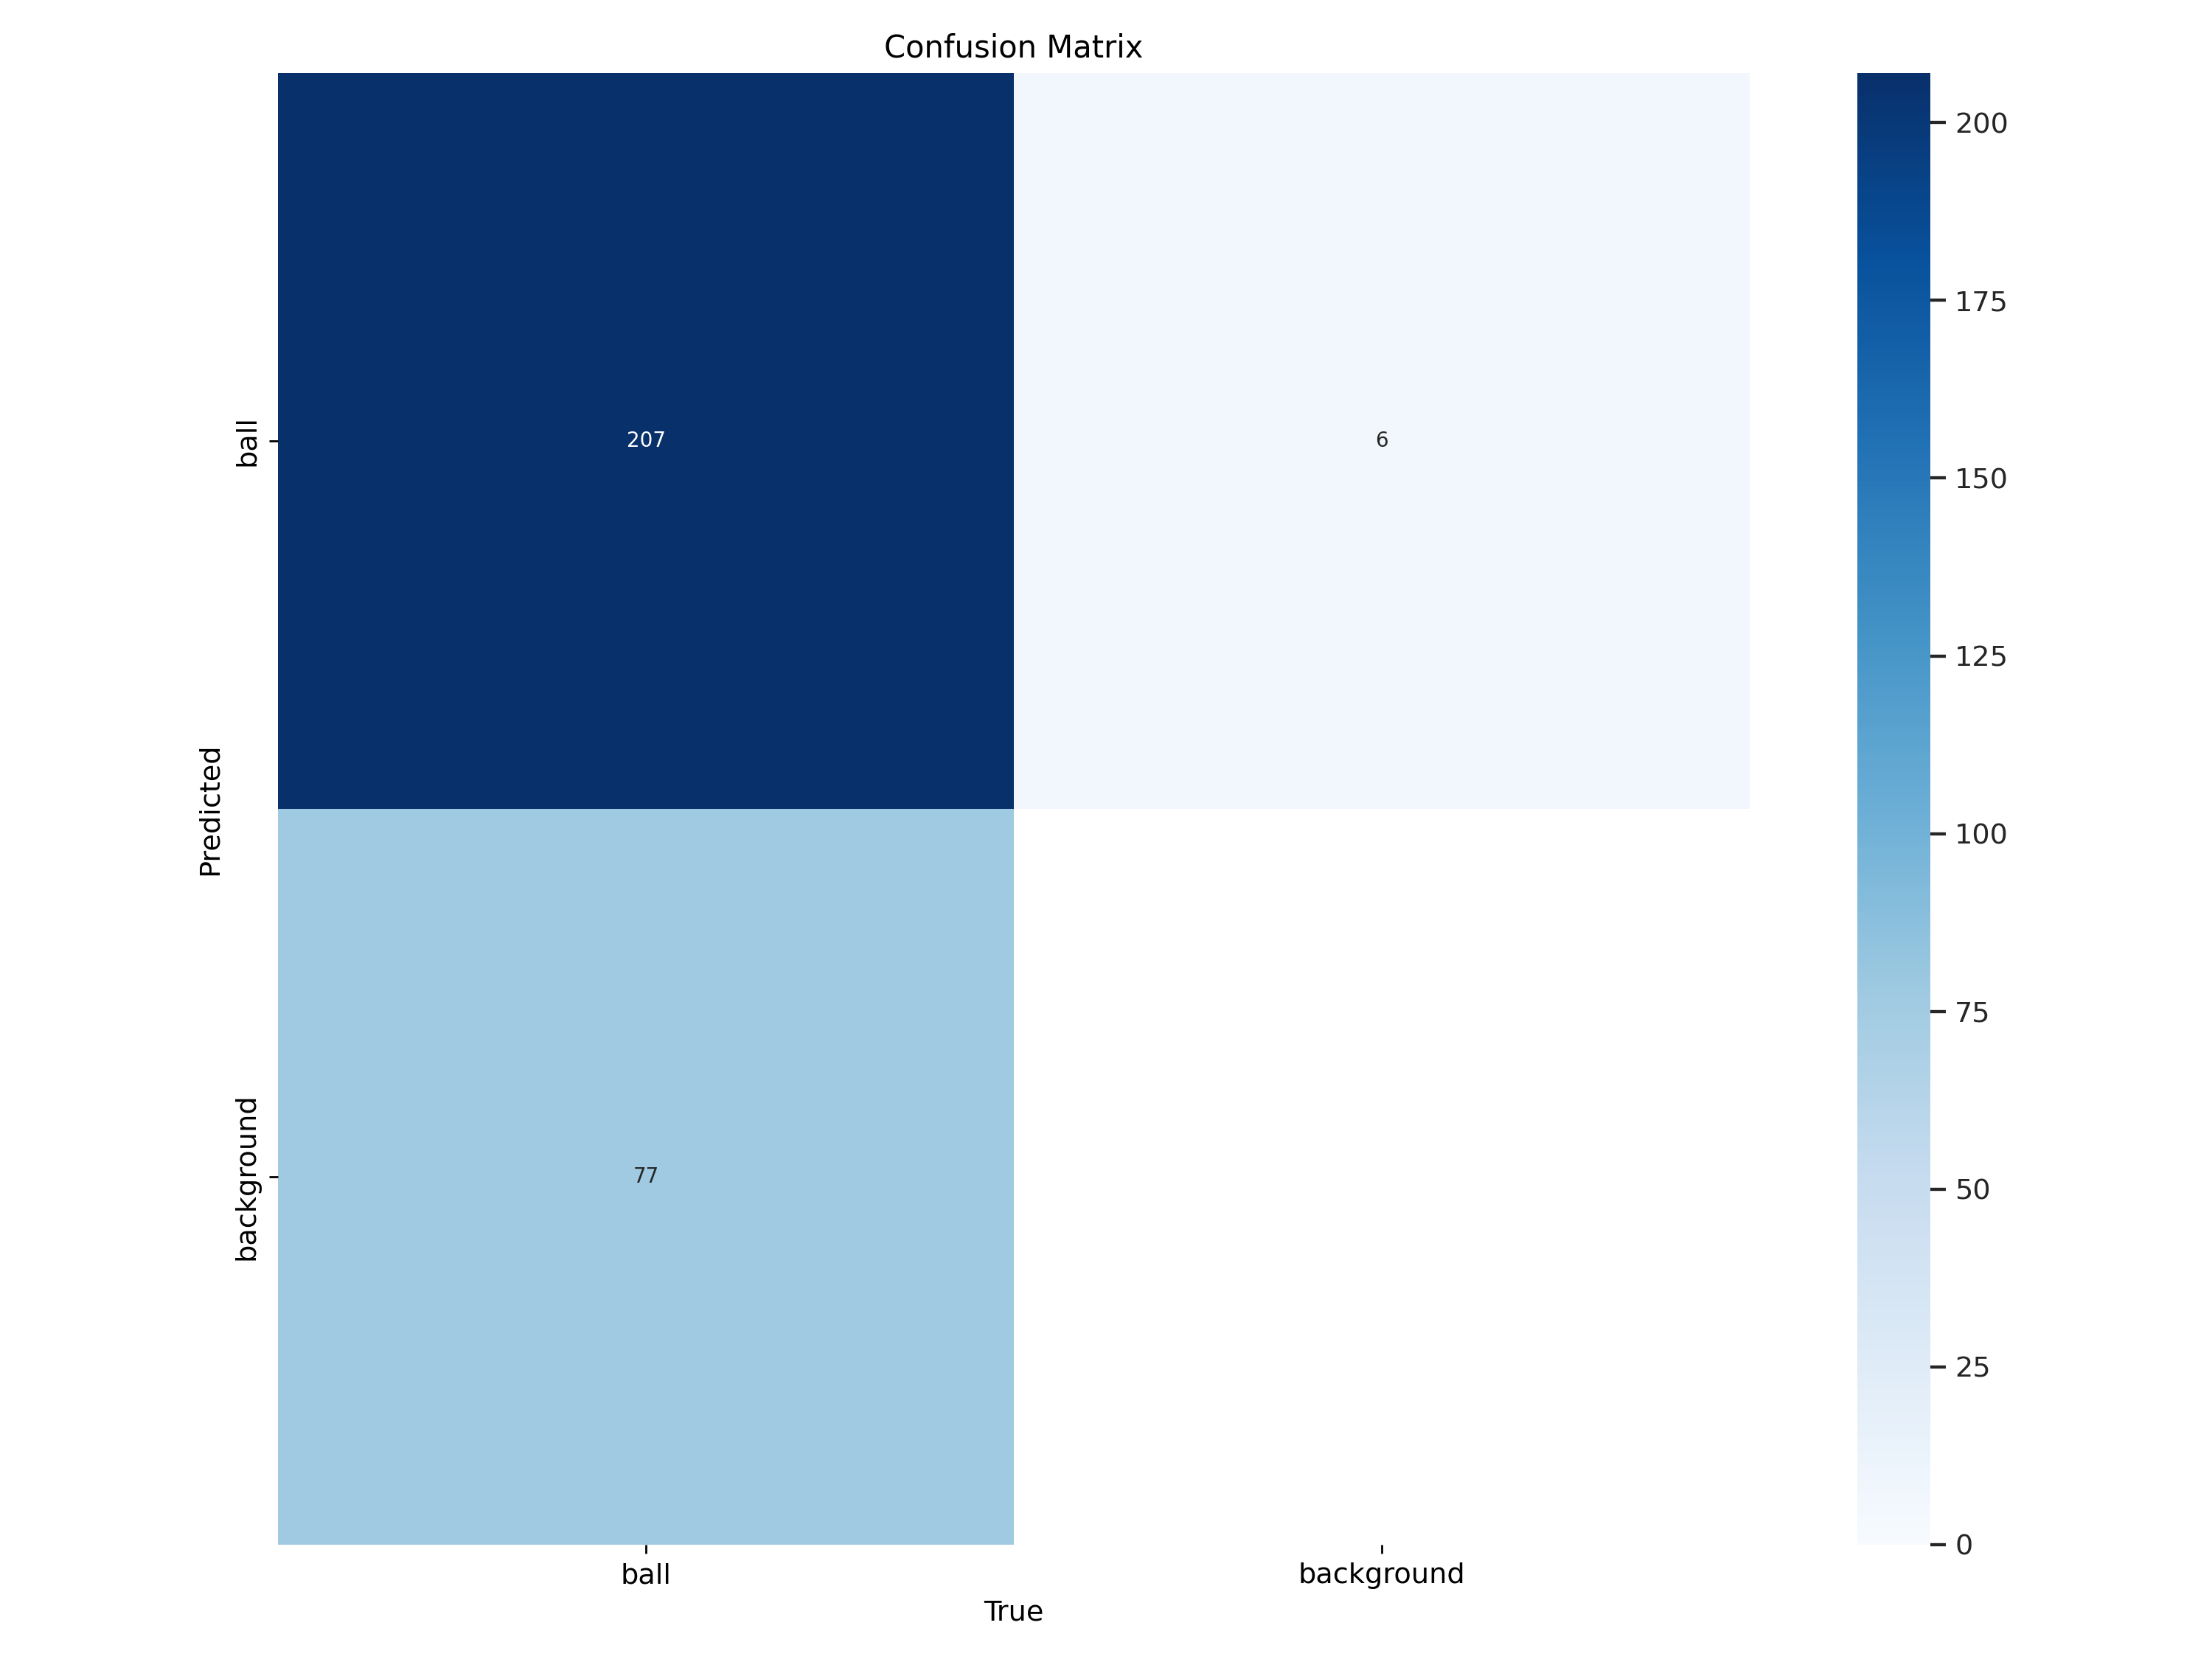

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/datasets


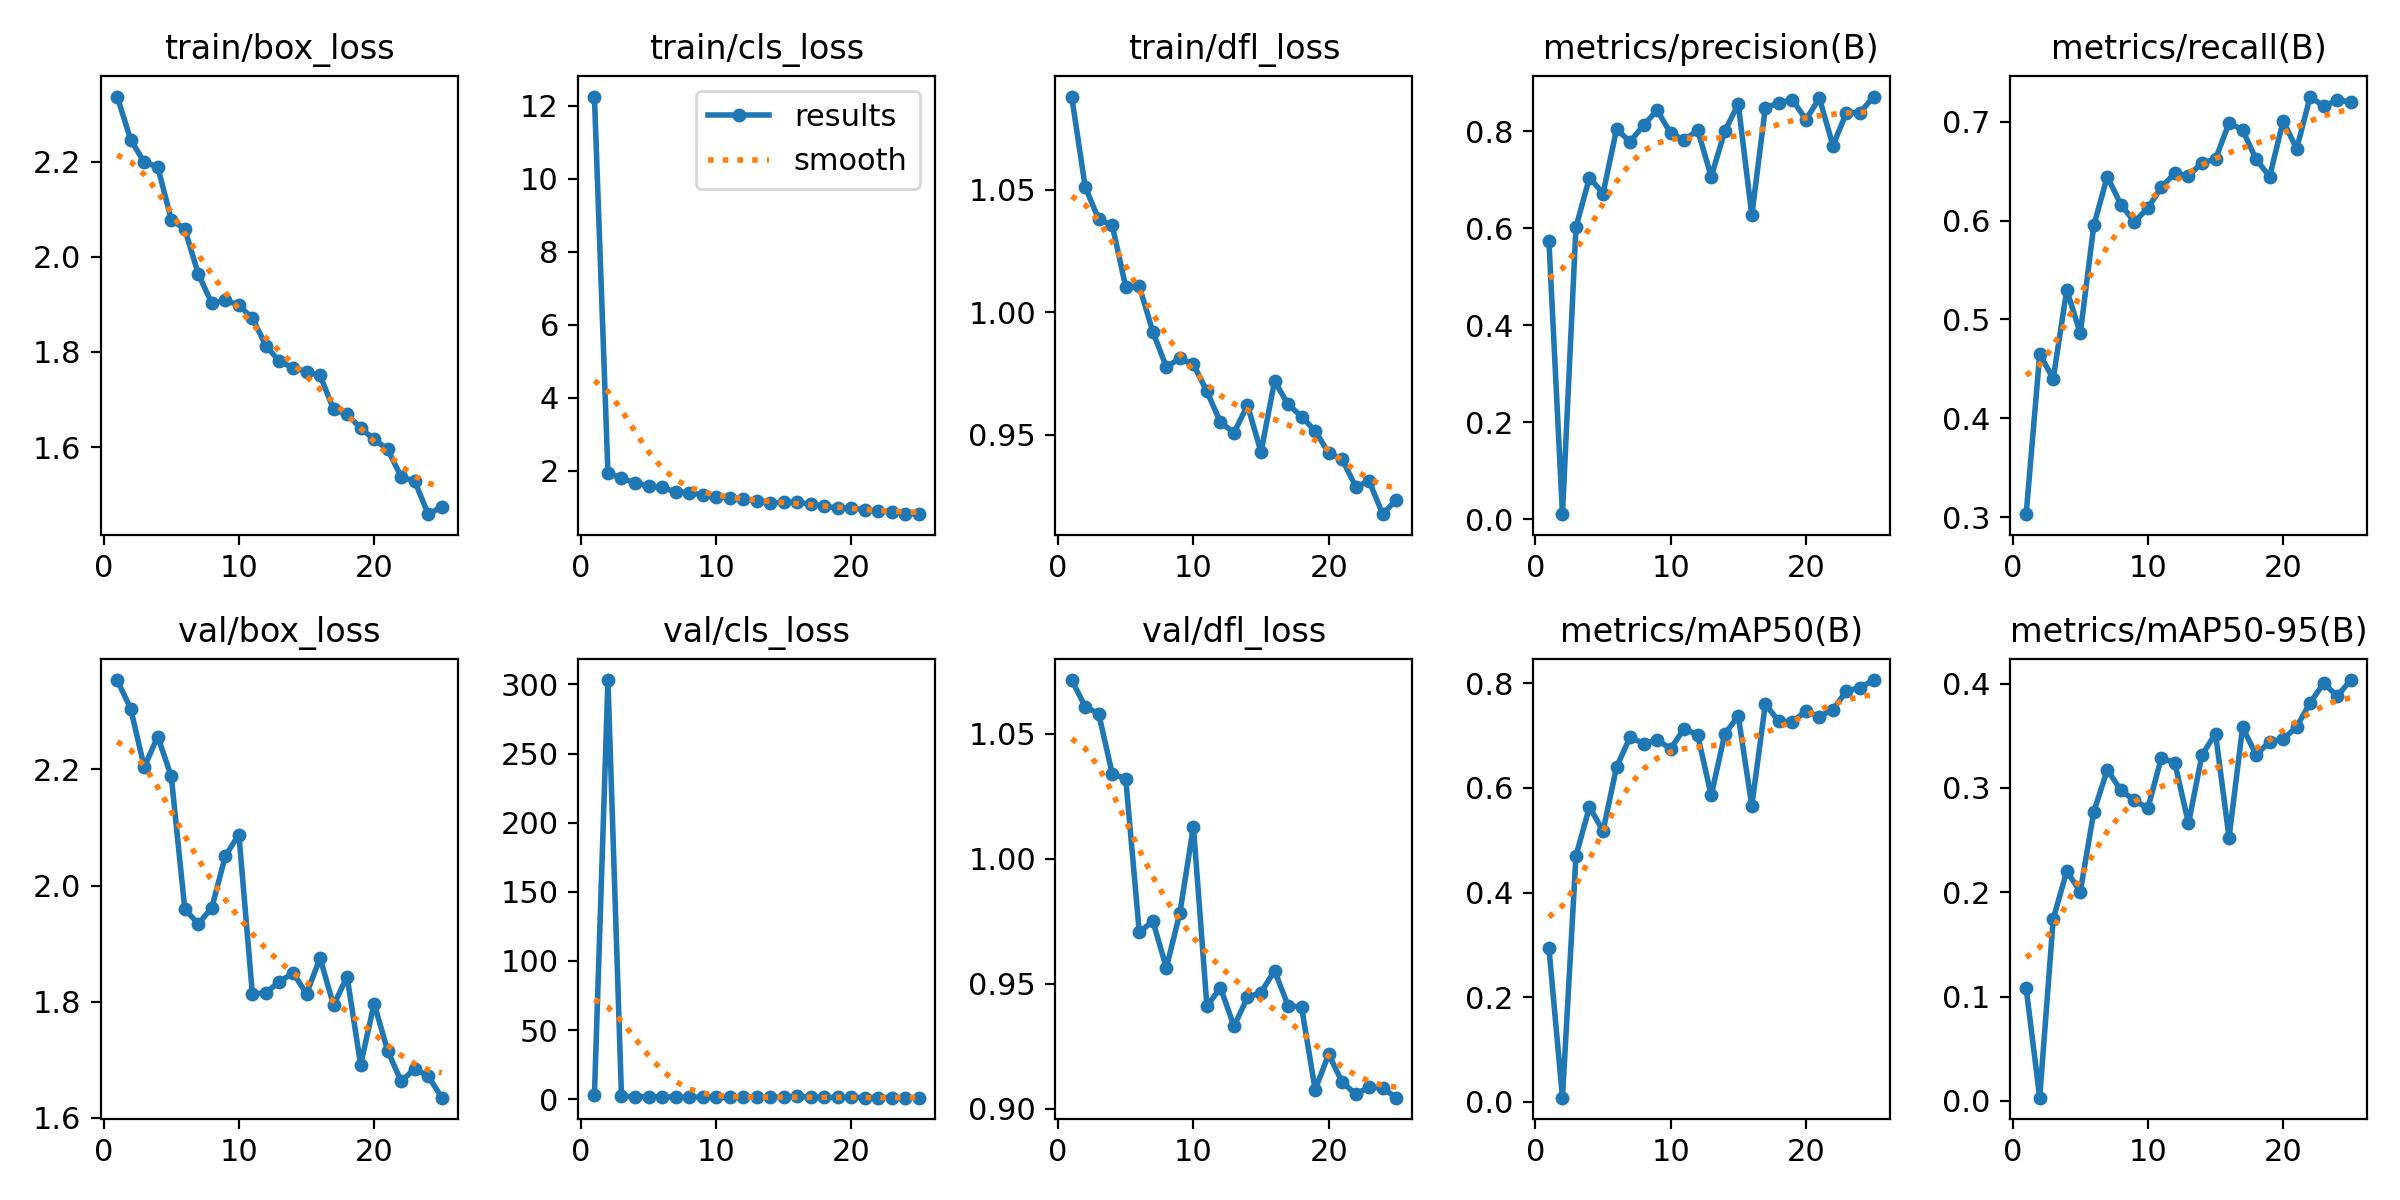

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/datasets


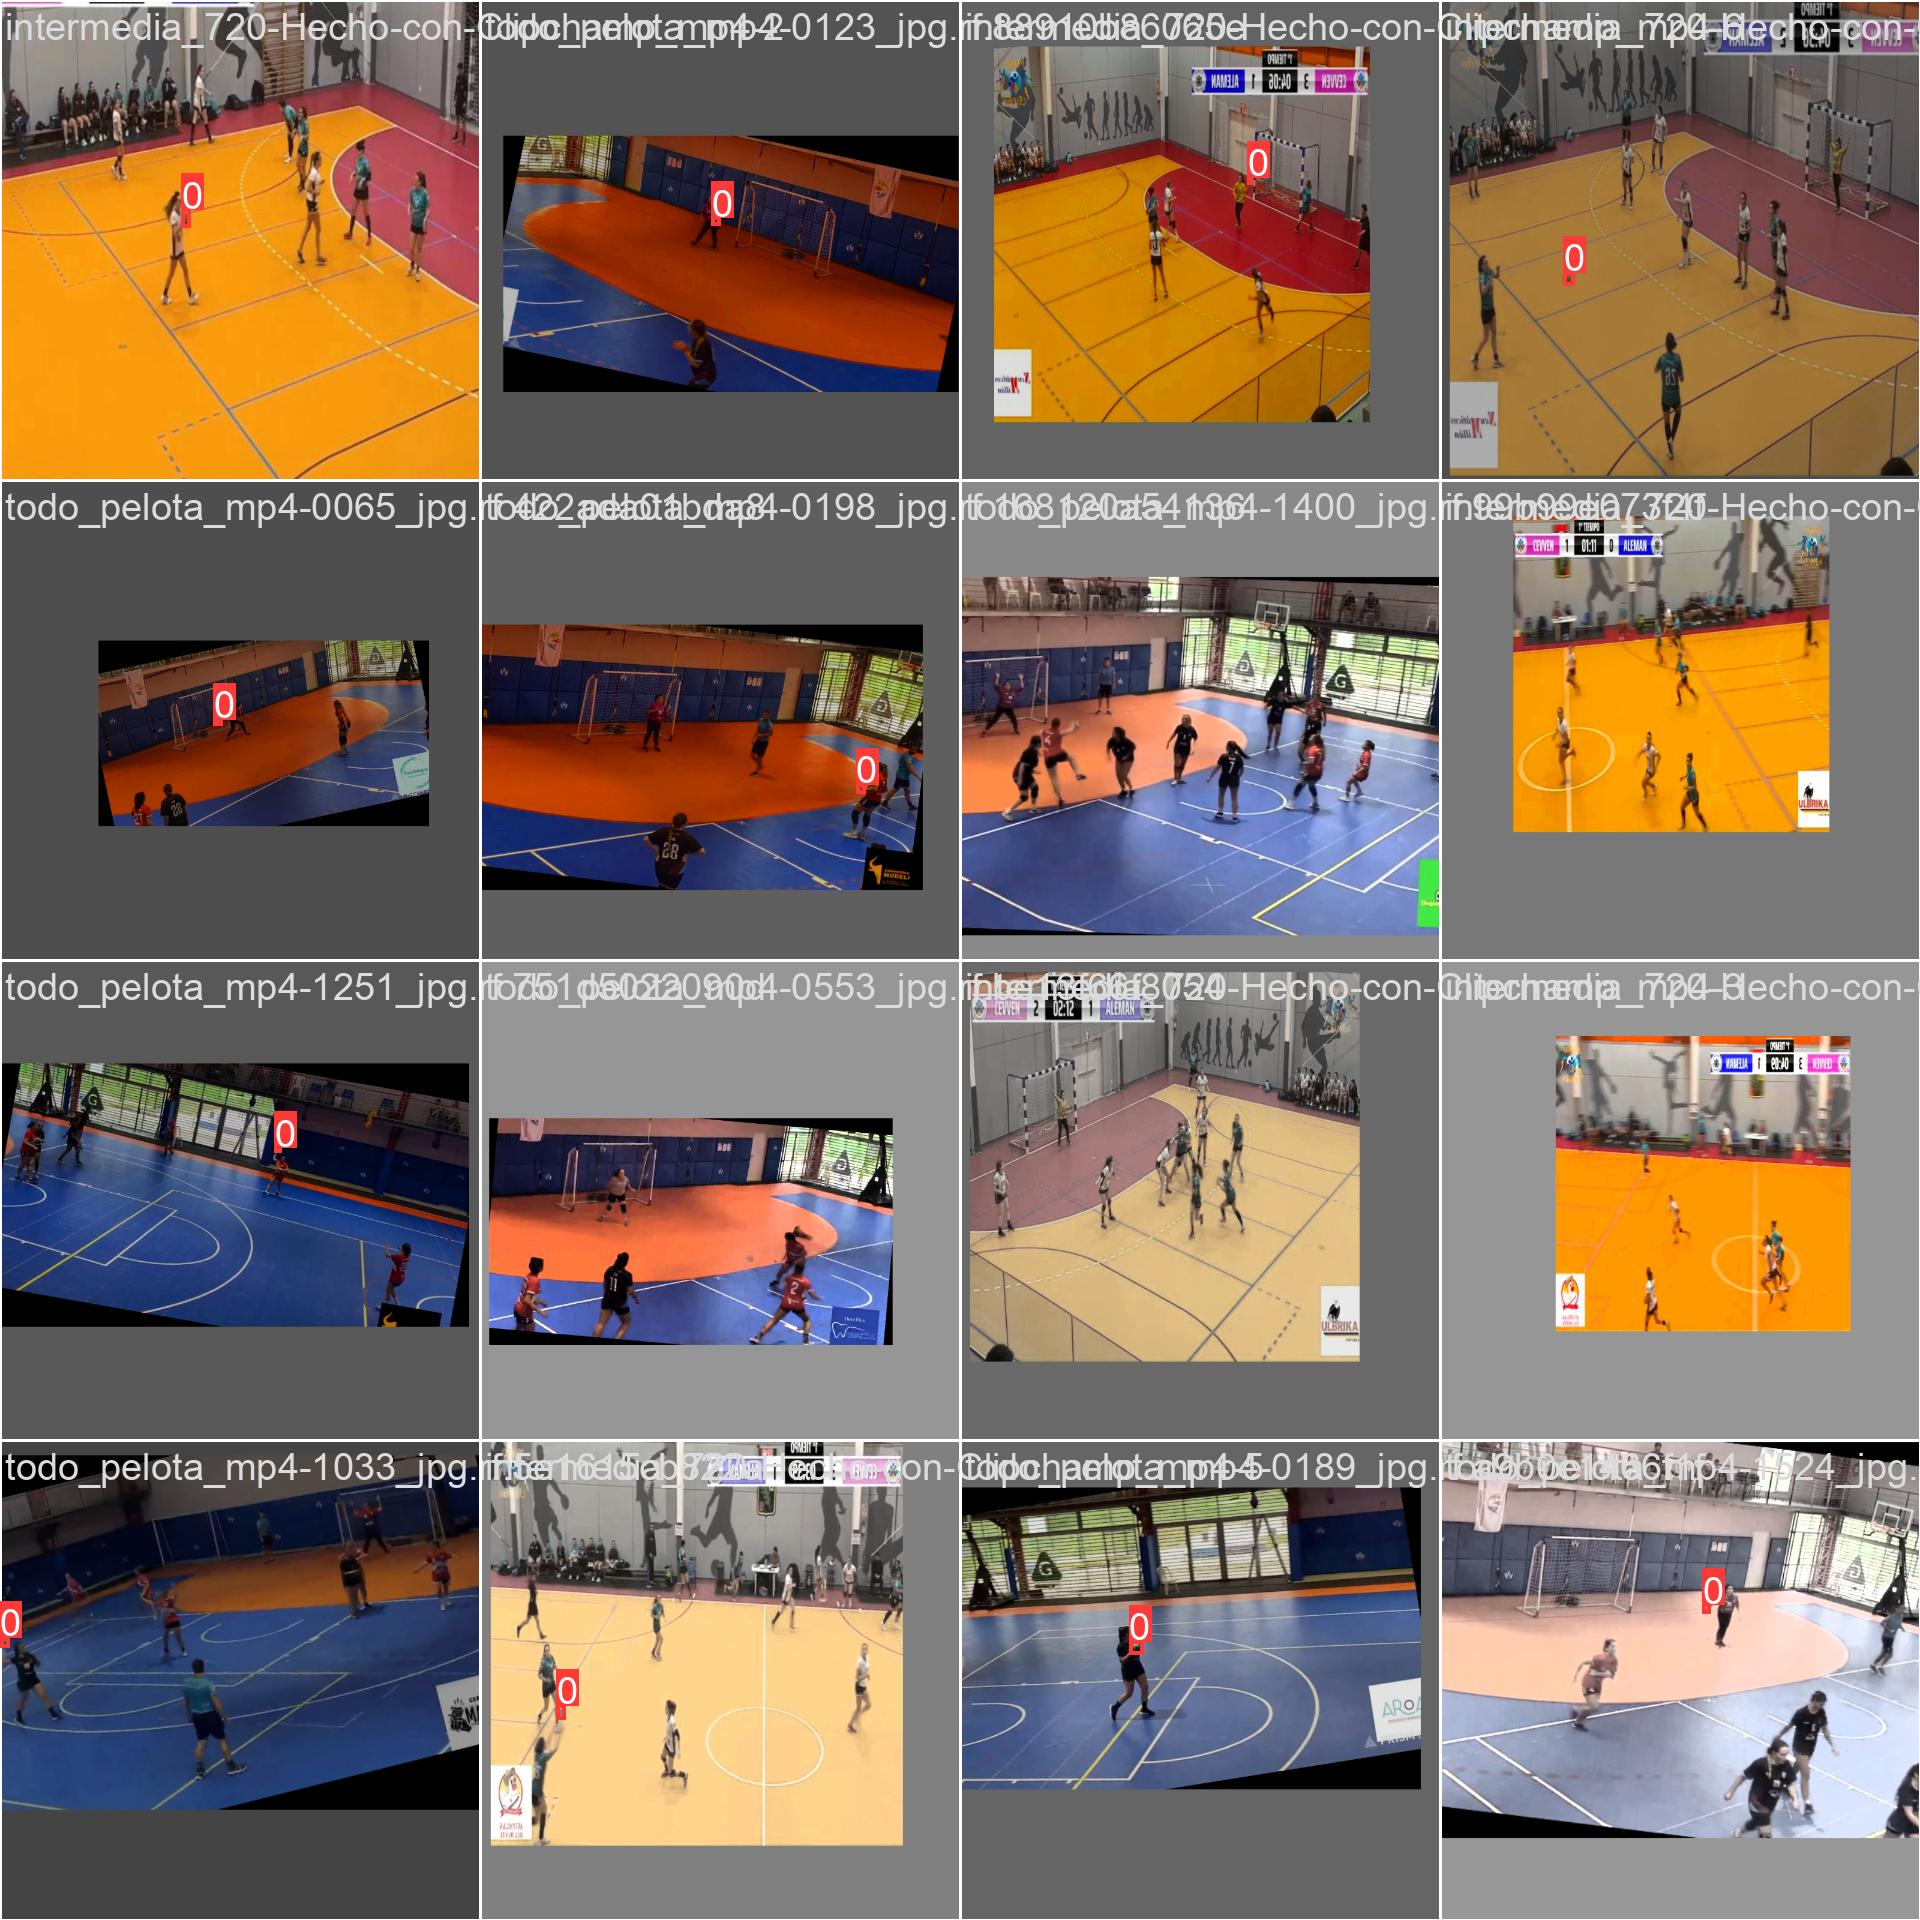

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch2520.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}


!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt  data=/root/datasets/combine/data.yaml


/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /root/datasets/combine/valid/labels.cache... 389 images, 111 backgrounds, 0 corrupt: 100% 389/389 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:08<00:00,  3.02it/s]
                   all        389        284      0.867      0.715      0.801      0.402
Speed: 0.7ms preprocess, 12.1ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}


!yolo task=detect mode=predict  model=/content/datasets/runs/detect/train/weights/best.pt  source=/content/datasets/Test02-2/test/images

#!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source=/content/Test02-2/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/vlc-record.mp4' save=True


/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 72.5ms
video 1/1 (2/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.6ms
video 1/1 (3/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (4/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (5/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (6/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.5ms
video 1/1 (7/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.3ms
video 1/1 (8/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (9/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (10/252) /content/drive/MyDrive/vlc-record.mp4: 480x800 1 ball, 15.2ms
video 1/1 (

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/intermedia_720p.mp4' save=True


Se han truncado las últimas 5000 líneas del flujo de salida.
video 1/1 (3638/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3639/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3640/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3641/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3642/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 2 balls, 9.9ms
video 1/1 (3643/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3644/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 9.9ms
video 1/1 (3645/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 10.2ms
video 1/1 (3646/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 1 ball, 10.0ms
video 1/1 (3647/8634) /content/drive/MyDrive/intermedia_720p.mp4: 480x800 (no detections), 12.3ms
video 1/1 (3648/8634) /content/drive/MyDrive/i

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Ahora puedes mover o copiar archivos desde Colab a tu Google Drive
#!cp -r /content/Test01-3/ /content/drive/MyDrive/Test01-3/
#!cp -r /content/runs/ /content/drive/MyDrive/Test01-3/runs/
# !cp -r  /content/datasets/Test02-3 /content/drive/MyDrive/Test02-3_p6




Mounted at /content/drive


In [ ]:
!cp -r  /content/datasets/runs/ /content/drive/MyDrive/Test03/

In [ ]:
import shutil
import os

# Define las rutas origen y destino
src_dir = "/content/datasets/runs/"
dst_dir = "/content/drive/MyDrive/Test03_p2/"

# Asegúrate de que el directorio destino existe
os.makedirs(dst_dir, exist_ok=True)

# Copia el contenido del directorio fuente al directorio destino
shutil.copytree(src_dir, dst_dir, dirs_exist_ok=True)

print("Copia completada.")





Copia completada.


In [ ]:
# Comprimir el directorio
!zip -r /content/datasets/runs.zip /content/datasets/runs


  adding: content/datasets/runs/ (stored 0%)
  adding: content/datasets/runs/detect/ (stored 0%)
  adding: content/datasets/runs/detect/val/ (stored 0%)
  adding: content/datasets/runs/detect/val/val_batch2_labels.jpg (deflated 9%)
  adding: content/datasets/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: content/datasets/runs/detect/val/confusion_matrix.png (deflated 39%)
  adding: content/datasets/runs/detect/val/P_curve.png (deflated 17%)
  adding: content/datasets/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/datasets/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: content/datasets/runs/detect/val/confusion_matrix_normalized.png (deflated 40%)
  adding: content/datasets/runs/detect/val/F1_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: content/datasets/runs/detect/val/R_curve.png (deflated 18%)
  adding: content/datasets/runs/detect/val/val_batch2_pred.jpg (deflated 9%)

In [ ]:
from google.colab import files

# Descargar el archivo comprimido
files.download('/content/datasets/runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /content/drive/MyDrive/Test03-p1

data.yaml  detect  runs  test  train  valid


In [ ]:
# Volver a montar Google Drive
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
